# Diseño de una Montaña Rusa



<em>
Una empresa de parques de atracciones está diseñando una nueva montaña
rusa y necesita que la trayectoria de la vía sea suave y continúe en todo el recorrido.
Para esto, solicitan que se realice un modelo matemático que utilice un método de
trazador cúbico sujeto. Además, requieren que el análisis de la estabilidad
estructural de la vía se haga utilizando un polinomio de mínimos cuadrados para
ajustar los datos experimentales obtenidos de las pruebas de tensión y compresión
del material. El diseño también debe incluir el uso de polinomios ortogonales para
optimizar la forma de ciertos tramos de la vía y mejorar la experiencia del usuario.
Finalmente, se necesita resolver un sistema de ecuaciones para determinar las
fuerzas que actúan en los puntos críticos de la estructura.
    </em>

<hr>

<h4>Integrantes</h4>
    <ul>
        <li><b>Eduardo Tovar CI: 28138831</b></li>
        <li><b>Luis Leon</b></li>
        <li><b>Juan</b></li>
        <li><b>Nelson</b></li>
    </ul>

<hr>

## Tomando los datos de los CSV 

In [50]:
import requests
import json
import pandas as pd

# Cargo los datos de los CSV
datos_1 = pd.read_csv("Puntos_1.csv") 
datos_2 = pd.read_csv("Puntos_2.csv")
datos_3 = pd.read_csv("Puntos_3.csv", header=None)

# Función para listar datos
def Listador(data):
    matriz = []
    for _, fila in data.iterrows():  
        fila_vector = fila.tolist() 
        matriz.append(fila_vector)  
    
    return matriz
    

# Datos para el paso 1
matriz_1 = Listador(datos_1)
# Datos para el paso 2
matriz_2 = Listador(datos_2)
# Datos para el paso 4
matriz_3 = Listador(datos_3)

# Datos para el paso 1
xi_1 = matriz_1[0]  
yi_1 = matriz_1[1]

# Datos para el paso 2
xi_2 = np.array(matriz_2[0])
yi_2 = np.array(matriz_2[1])

# Datos para el paso 4
# Seleccionaa la fila 5 como vector 
b = datos_3.iloc[3, :].values.reshape(-1, 1)  # Convierte a vector columna
A = sp.Matrix(matriz_3[:-1])
b = sp.Matrix(b)

print("Datos obtenidos de forma correcta")

Datos obtenidos de forma correcta


<hr>

# Paso 1: Método de Trazador Cúbico Sujeto

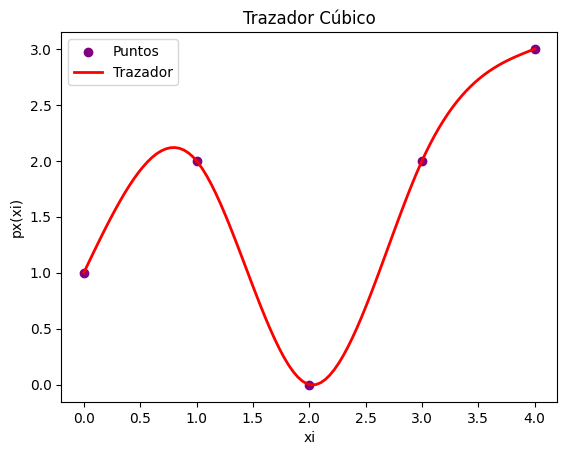

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def TrazadorCubico(xi, yi):
    n = len(xi)
    
    # Creando el valor h
    h = np.zeros(n-1)
    for j in range(n-1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros((n-2, n-2))
    B = np.zeros(n-2)
    S = np.zeros(n)
    
    A[0, 0] = 2 * (h[0] + h[1])
    A[0, 1] = h[1]
    B[0] = 6 * ((yi[2] - yi[1]) / h[1] - (yi[1] - yi[0]) / h[0])
    
    for i in range(1, n-3):
        A[i, i-1] = h[i]
        A[i, i] = 2 * (h[i] + h[i+1])
        A[i, i+1] = h[i+1]
        factor21 = (yi[i+2] - yi[i+1]) / h[i+1]
        factor10 = (yi[i+1] - yi[i]) / h[i]
        B[i] = 6 * (factor21 - factor10)
    
    A[n-3, n-3] = 2 * (h[n-3] + h[n-2])
    A[n-3, n-4] = h[n-3]
    factor12 = (yi[n-1] - yi[n-2]) / h[n-2]
    factor23 = (yi[n-2] - yi[n-3]) / h[n-3]
    B[n-3] = 6 * (factor12 - factor23)
    
    # Resolver el sistema de ecuaciones
    r = np.linalg.solve(A, B)
    
    for j in range(1, n-1):
        S[j] = r[j-1]
    
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    d = np.zeros(n-1)
    
    for j in range(n-1):
        a[j] = (S[j+1] - S[j]) / (6 * h[j])
        b[j] = S[j] / 2
        factor10 = (yi[j+1] - yi[j]) / h[j]
        c[j] = factor10 - (2 * h[j] * S[j] + h[j] * S[j+1]) / 6
        d[j] = yi[j]
    
    # Construcción del polinomio
    x = sp.symbols("x")
    px_tabla = []
    
    for j in range(n-1):
        pxtramo = a[j] * (x - xi[j])**3 + b[j] * (x - xi[j])**2
        pxtramo += c[j] * (x - xi[j]) + d[j]
        pxtramo = sp.expand(pxtramo)
        px_tabla.append(pxtramo)
    
    return px_tabla


px_tabla = TrazadorCubico(xi_1, yi_1)
x_vals_1 = np.linspace(xi_1[0], xi_1[-1], 100)


# Evaluación y trazado
x = sp.symbols("x")
y_vals_1 = np.zeros_like(x_vals_1)

for tramo in range(len(px_tabla)):
    a, b = xi_1[tramo], xi_1[tramo+1]
    mask = (x_vals_1 >= a) & (x_vals_1 <= b)
    
    pxtramo = px_tabla[tramo]
    pxt = sp.lambdify(x, pxtramo, "numpy")
    y_vals_1[mask] = pxt(x_vals_1[mask])

# Gráfica
plt.scatter(xi_1, yi_1, label="Puntos", color="purple")
plt.plot(x_vals_1, y_vals_1, label="Trazador", color="red", linewidth=2)
plt.title("Trazador Cúbico")
plt.xlabel("xi")
plt.ylabel("px(xi)")
plt.legend()
plt.show()


<hr>

## Paso 2: Polinomio de Mínimos Cuadrados

f(x) = 0.85*x + 1.62
Coeficiente de correlación r  = 0.9047
Coeficiente de determinación r² = 0.8184
81.84% de los datos está descrito en el modelo lineal


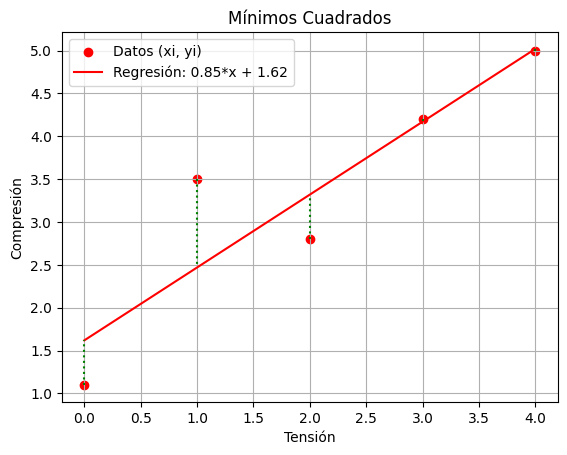

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

n = len(xi_2)

# Cálculo de promedios y sumatorias
xm = np.mean(xi_2)
ym = np.mean(yi_2)
sx = np.sum(xi_2)
sy = np.sum(yi_2)
sxy = np.sum(xi_2 * yi_2)
sx2 = np.sum(xi_2**2)
sy2 = np.sum(yi_2**2)

# Rango de valores para la gráfica
x_vals_2 = np.linspace(xi_2[0], xi_2[-1], 100)

# Coeficientes del polinomio de regresión lineal
a1 = (n * sxy - sx * sy) / (n * sx2 - sx**2)
a0 = ym - a1 * xm

# Definir el polinomio de grado 1 en SymPy
x = sp.Symbol("x")
f = a0 + a1 * x

# Convertir la función simbólica a una función numérica evaluable
fx = sp.lambdify(x, f, "numpy")

# Evaluar la función en los puntos xi_2
fi = fx(xi_2)

# Coeficiente de correlación
numerador = n * sxy - sx * sy
raiz1 = np.sqrt(n * sx2 - sx**2)
raiz2 = np.sqrt(n * sy2 - sy**2)
r = numerador / (raiz1 * raiz2)

# Coeficiente de determinación
r2 = r**2
r2_porcentaje = round(r2 * 100, 2)

# SALIDA
print(f"f(x) = {sp.expand(f)}")
print(f"Coeficiente de correlación r  = {r:.4f}")
print(f"Coeficiente de determinación r² = {r2:.4f}")
print(f"{r2_porcentaje}% de los datos está descrito en el modelo lineal")

# Gráfica
plt.scatter(xi_2, yi_2, color="red", label="Datos (xi, yi)")
plt.plot(x_vals_2, fx(x_vals_2), color="red", label=f"Regresión: {sp.expand(f)}")

# Líneas de error
for i in range(n):
    plt.plot([xi_2[i], xi_2[i]], [yi_2[i], fi[i]], color="green", linestyle="dotted")

plt.xlabel("Tensión")
plt.ylabel("Compresión")
plt.title("Mínimos Cuadrados")
plt.legend()
plt.grid()
plt.show()

<hr>

## Paso 3: Polinomios Ortogonales

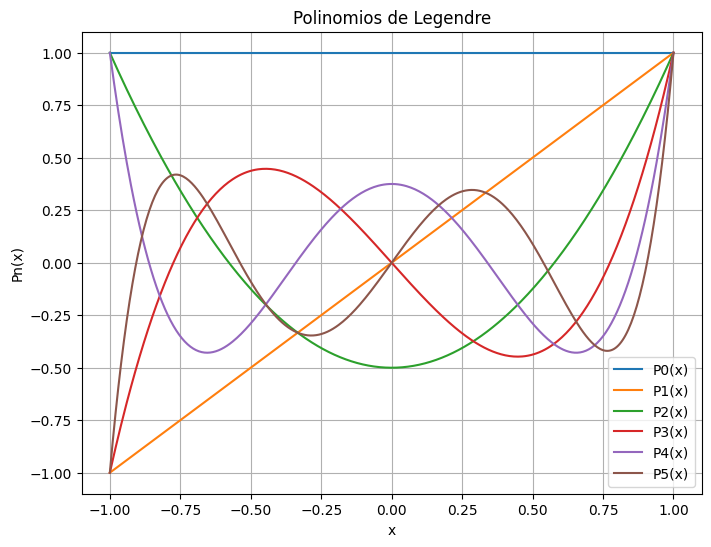

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de los polinomios de Legendre
def polinomio_legendre(n, x):
    if n == 0:
        return np.ones(len(x))
    elif n == 1:
        return x
    else:
        p_n_1 = polinomio_legendre(n - 1, x)
        p_n_2 = polinomio_legendre(n - 2, x)
        return ((2 * n - 1) * x * p_n_1 - (n - 1) * p_n_2) / n

# Valores de x
x = np.linspace(-1, 1, 400)

# Genera los polinomios de Legendre de grado 0 a 5
n_values = range(6)

valores_legendre = [polinomio_legendre(n, x) for n in n_values]

# Graficar los Polinomios de Legendre
plt.figure(figsize=(8, 6))

for i, n in enumerate(n_values):
    plt.plot(x, valores_legendre[i], label=f"P{n}(x)")

plt.xlabel("x")
plt.ylabel("Pn(x)")
plt.title("Polinomios de Legendre")
plt.legend()
plt.grid(True)
plt.ylim(-1.1, 1.1)
plt.show()


<hr>

## Paso 4: Resolución de Ecuaciones

In [51]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir incógnitas
x1, x2, x3 = sp.symbols("x1 x2 x3")

# Crear el vector de incógnitas
v = sp.Matrix([x1, x2, x3])

# Mostrar las matrices
sp.pprint(A)
sp.pprint(b)

# Resolver el sistema de ecuaciones Ax = b
solucion = sp.linsolve((A, b), x1, x2, x3)

# Mostrar la solución
print("Resolución de Ecuaciones Lineales")
sp.pprint(solucion)

# Extraer valores de la solución
solucion_lista = list(solucion)[0]
valx1 = float(solucion_lista[0])
valx2 = float(solucion_lista[1])
valx3 = float(solucion_lista[2])



⎡1  2   1 ⎤
⎢         ⎥
⎢2  -1  1 ⎥
⎢         ⎥
⎣3  1   -1⎦
⎡4 ⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣-2⎦
Resolución de Ecuaciones Lineales
⎧⎛      14     ⎞⎫
⎨⎜-1/5, ──, 7/3⎟⎬
⎩⎝      15     ⎠⎭
